In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Tuple
from scipy.stats import norm
from __future__ import annotations

In [9]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
import time
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [223]:
df = pd.read_csv('01338546_cw2.csv')
df.head()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
0,-0.197453,585.868154,1.009978,0.647824,0.746141,0.878928,31.949796,11.489279,11.329172,0.983281,...,1.076540,1.055297,0.004314,0.001346,0.000328,0.475133,0.709879,0.183606,0.081405,7.533925
1,0.023318,529.171236,1.054902,0.748706,0.666528,0.867296,32.508270,10.285764,-42.402380,0.982535,...,1.110694,0.940491,0.000978,0.001058,0.000391,0.531378,0.199470,0.690574,0.852335,5.444432
2,0.167295,717.111020,0.992480,0.574169,0.707061,0.902997,34.078560,12.616684,46.703139,0.989081,...,1.159039,0.838019,0.001885,0.001215,0.000187,0.691915,0.659952,0.491718,0.530462,5.689244
3,0.117000,837.854456,1.003714,0.629887,0.706144,0.919262,37.796627,13.686802,-56.868570,0.994401,...,1.108158,0.806543,0.003498,0.000525,0.000278,0.695380,0.070318,0.020382,0.566340,14.433967
4,0.022054,589.017983,1.114575,0.809666,0.756456,0.838494,36.458427,9.851975,4.203777,0.981060,...,1.173006,0.893561,0.002130,0.001030,0.000176,0.461926,0.059788,0.854403,0.394957,9.706908


In [21]:
df.shape

(500, 40)

In [23]:
df.dropna().shape ## no Nan values
#df.X1.value_counts(dropna=False).iloc[0]

(500, 40)

In [1]:
df.info() # all type float64

In [22]:
df.describe()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.056273,556.807833,1.050097,0.681511,0.711846,0.872603,32.119197,10.548969,0.309580,0.981733,...,1.126544,0.827226,0.002048,0.001164,0.000264,0.494391,0.503999,0.510777,0.492423,9.894734
std,0.139667,150.567177,0.071199,0.117610,0.045785,0.057994,4.866307,1.759218,53.761297,0.016037,...,0.124503,0.198203,0.001461,0.000402,0.000082,0.289423,0.294534,0.285452,0.293940,4.073035
min,-0.463957,99.744578,0.970873,0.212388,0.474847,0.413623,12.829498,3.552180,-93.152046,0.815450,...,0.824610,0.310894,0.000674,0.000513,0.000106,0.001435,0.003529,0.000165,0.002191,-2.354907
25%,-0.046992,468.012060,1.005016,0.621386,0.683744,0.848064,29.509492,9.703070,-44.520729,0.977935,...,1.051746,0.690785,0.001232,0.000902,0.000208,0.241733,0.247861,0.279979,0.233992,7.317583
50%,0.046812,544.395408,1.033409,0.699857,0.716652,0.883699,31.901130,10.472793,-0.053177,0.985393,...,1.109181,0.868716,0.001604,0.001070,0.000248,0.488342,0.509296,0.517455,0.495365,9.978195
75%,0.158588,645.714901,1.071081,0.762014,0.744664,0.910753,35.005051,11.822370,48.125212,0.990516,...,1.177803,0.977397,0.002319,0.001330,0.000305,0.745857,0.765728,0.771382,0.747903,12.608974
max,0.419470,1269.381000,1.535924,0.927731,0.815037,0.974847,53.340952,15.577341,92.914771,1.018464,...,1.715615,1.222953,0.019133,0.003220,0.000823,0.999845,0.998872,0.999176,0.998254,21.901799


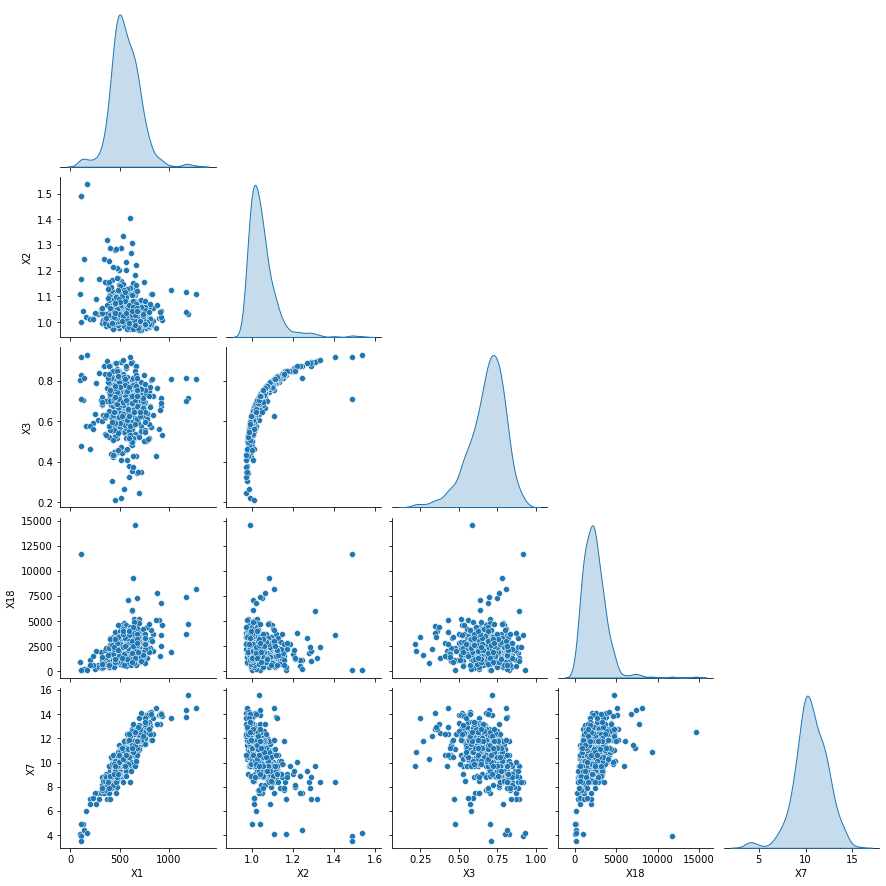

In [250]:
sns.pairplot(df, vars = ["X1","X2","X3","X6","X7"], diag_kind="kde", corner=True) # expand on this, more granular
plt.savefig('pp.pdf')

potential multicollinearity, design matrix is said to be multicollinear if the columns are close to being perfectly
multicollinear, in the sense that a linear combination of some of the columns of X can very well predict the values of
another column, y can lead to imprecise estimation of parameters (Heard)

In [253]:
corr_matrix =df.corr()
corr_matrix[df.corr()>0.7].head()

,y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
y,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X1,NaN,1.0,NaN,NaN,NaN,NaN,0.861788,0.8897,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2,NaN,NaN,1.000000,0.735316,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X3,NaN,NaN,0.735316,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
(sum(corr_matrix[corr_matrix>0.7].count()) - 40)/2
#corr_matrix[corr_matrix>0.7].iloc[:,1:]#.value_counts()

14.0

QQ plot check normality of y target variable.

C:\Users\shane\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


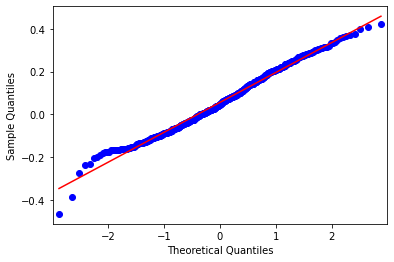

In [220]:
import statsmodels.api as sm
import pylab as py
  
sm.qqplot(df.y, line ='s')
plt.savefig('qq.pdf')
py.show()

Text(0.5, 1.0, 'Boxplot of Target Variable')

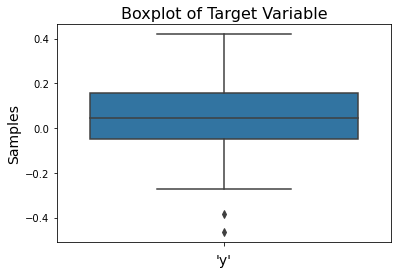

In [42]:
# a few notable potential outliers
fig, ax = plt.subplots()
ax = sns.boxplot(data = df, y = "y")
ax.set_ylabel("Samples", fontsize = 14)
ax.set_xlabel("'y'", fontsize = 14)
ax.set_title("Boxplot of Target Variable", fontsize = 16)

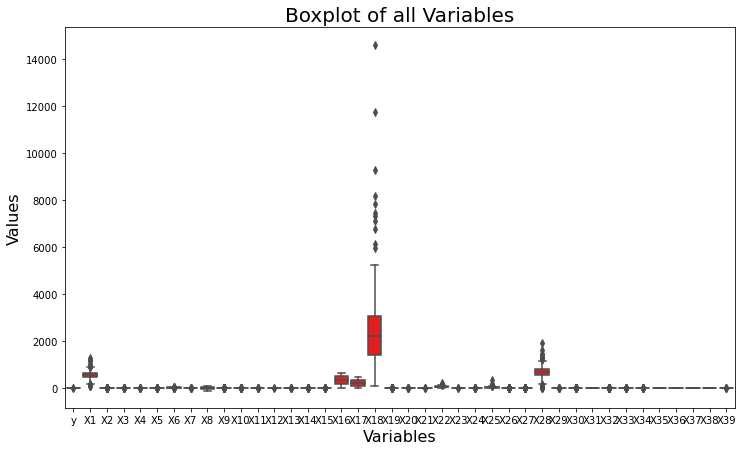

In [216]:
# X18 very large, scaling necessary
fig, ax = plt.subplots(figsize = (12,7))
ax = sns.boxplot(data = df, color = 'red')
ax.set_ylabel("Values", fontsize = 16)
ax.set_xlabel("Variables", fontsize = 16)
ax.set_title("Boxplot of all Variables", fontsize = 20)
plt.savefig('box1.pdf')

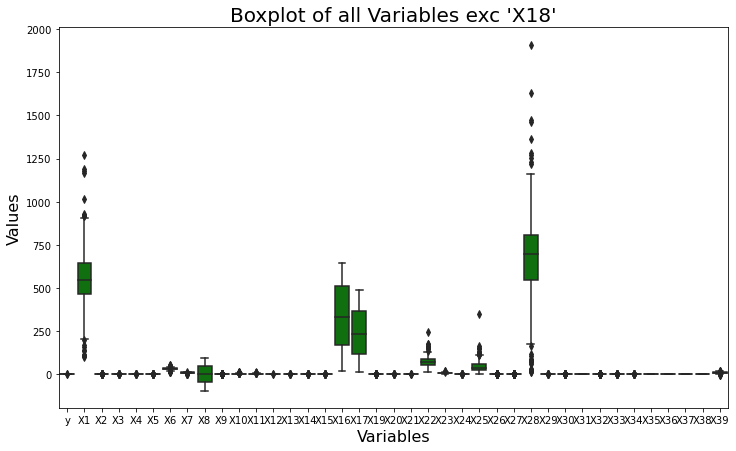

In [219]:
# many potential outliers, perhaps Ward best method
df1 = df.drop('X18', axis=1)
fig, ax = plt.subplots(figsize = (12,7))
ax = sns.boxplot(data = df1, color= 'green')
ax.set_ylabel("Values", fontsize = 16)
ax.set_xlabel("Variables", fontsize = 16)
ax.set_title("Boxplot of all Variables exc 'X18'", fontsize = 20)
plt.savefig('box2.pdf')

In [2]:
scaled_df[scaled_df==0].count() # not sparse data

# Part A

### Hierarchical Clustering

In [113]:
scaled_df = (df - df.mean()) / df.std()
X_scaled = scaled_df.iloc[:,1:]
#X_scaled.shape

In [114]:
X_scaled.T.shape

(39, 500)

In [115]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [116]:
# transpose for features
clustering = AgglomerativeClustering(n_clusters = 2, affinity='euclidean', linkage='ward').fit(X_scaled.T) 
silhouette_score(X_scaled.T, clustering.labels_) # scores close to 1 best

0.11221228343392668

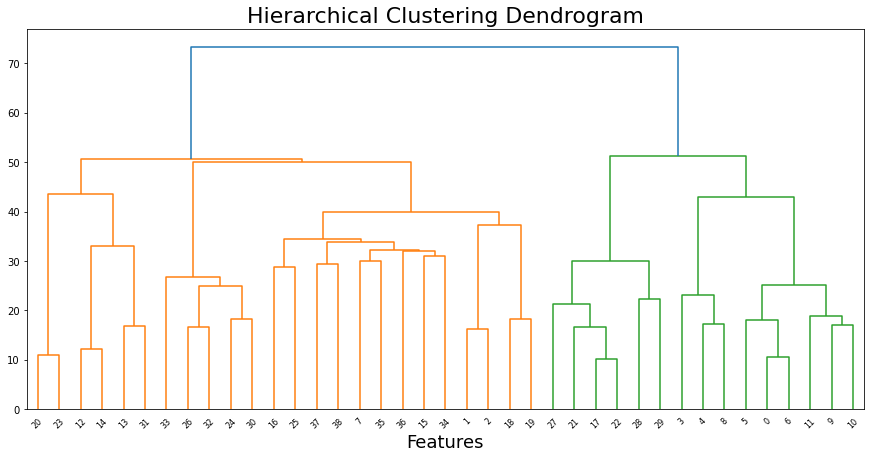

In [117]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold = 0, n_clusters=None, affinity='euclidean', linkage='ward')

model = model.fit(X_scaled.T)
fig, ax = plt.subplots(figsize = (15,7))
plt.title("Hierarchical Clustering Dendrogram", fontsize = 22)
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level")
plt.xlabel("Features", fontsize = 18)
plt.savefig("hcd.pdf")
plt.show()

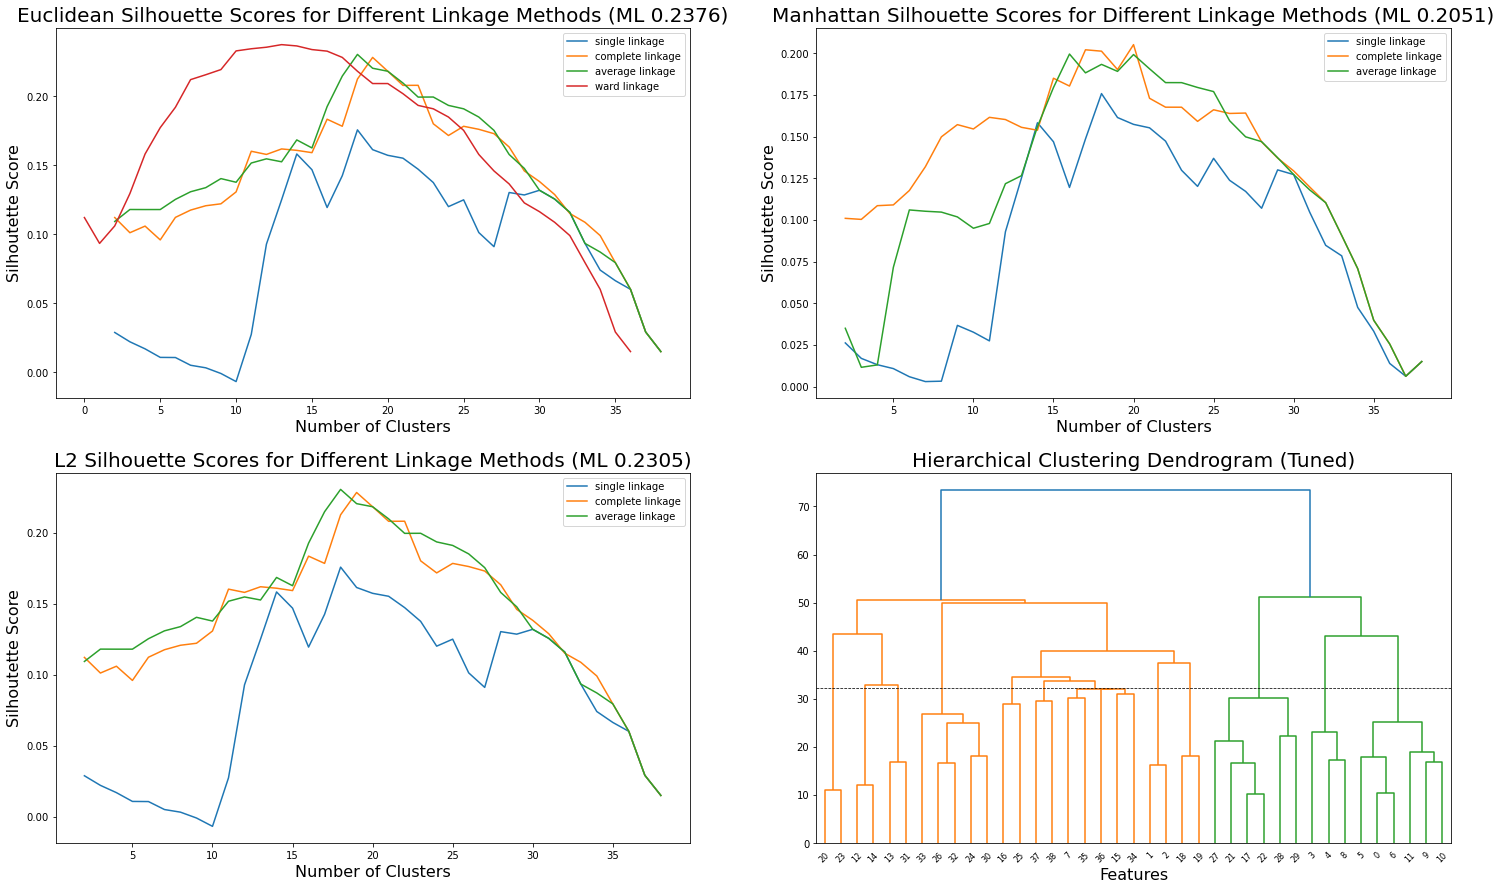

In [132]:
fig, axs = plt.subplots(2, 2, figsize=(25,15))
def hc(n_clusters, affinity, linkage):
    clustering = AgglomerativeClustering(n_clusters = n_clusters, affinity=affinity, linkage=linkage).fit(X_scaled.T)
    return silhouette_score(X_scaled.T, clustering.labels_)


# affinity = ["euclidean", 'manhattan','l2']
affinity = ["euclidean"]
linkage = ["single","complete", "average", "ward"] # not too comp expensive
n_clusters = np.arange(2, 39)
ind = np.arange(12)

for a in affinity:
    silhouettes_s = []
    silhouettes_c = []
    silhouettes_a = []
    silhouettes_w = []
    for l in linkage:   
        for n in n_clusters:
            if l == "single":
                silhouettes_s.append(hc(n, a,l))
            elif l == "complete":
                silhouettes_c.append(hc(n, a, l))
            elif l == "average":
                silhouettes_a.append(hc(n, a, l))
            else: 
                silhouettes_w.append(hc(n, a, l))
axs[0,0].plot(n_clusters, silhouettes_s, label = 'single linkage')
axs[0,0].plot(n_clusters, silhouettes_c, label = 'complete linkage')
axs[0,0].plot(n_clusters, silhouettes_a, label = 'average linkage')
axs[0,0].plot(silhouettes_w, label = 'ward linkage')
axs[0,0].set_title(f'Euclidean Silhouette Scores for Different Linkage Methods (ML {round(max(silhouettes_w), 4)})', fontsize = 20)
axs[0,0].set_xlabel("Number of Clusters", fontsize = 16)
axs[0,0].set_ylabel("Silhoutette Score", fontsize = 16)
#ax.set_xticks(ticks = ind, labels = ['2', '4','6','8','10'])
axs[0,0].legend()

affinity = "manhattan"
linkage = ["single","complete", "average"] # not too comp expensive
n_clusters = np.arange(2, 39)
ind = np.arange(12)

silhouettes_s = []
silhouettes_c = []
silhouettes_a = []

for l in linkage:   
    for n in n_clusters:
        if l == "single":
            silhouettes_s.append(hc(n, affinity, l))
        elif l == "complete":
            silhouettes_c.append(hc(n, affinity, l))
        else:  
            silhouettes_a.append(hc(n, affinity, l))

axs[0,1].plot(n_clusters, silhouettes_s, label = 'single linkage')
axs[0,1].plot(n_clusters, silhouettes_c, label = 'complete linkage')
axs[0,1].plot(n_clusters, silhouettes_a, label = 'average linkage')
axs[0,1].set_title(f'Manhattan Silhouette Scores for Different Linkage Methods (ML {round(max(silhouettes_c), 4)})', fontsize = 20)
axs[0,1].set_xlabel("Number of Clusters", fontsize = 16)
axs[0,1].set_ylabel("Silhoutette Score", fontsize = 16)
#ax.set_xticks(ticks = ind, labels = ['2', '4','6','8','10'])
axs[0,1].legend()

affinity = ["l2"]
linkage = ["single","complete", "average"] # not too comp expensive
n_clusters = np.arange(2, 39)
ind = np.arange(12)

for a in affinity:
    silhouettes_s = []
    silhouettes_c = []
    silhouettes_a = []
    for l in linkage:   
        for n in n_clusters:
            if l == "single":
                silhouettes_s.append(hc(n, a,l))
            elif l == "complete":
                silhouettes_c.append(hc(n, a, l))
            else:  
                silhouettes_a.append(hc(n, a, l))
    
axs[1,0].plot(n_clusters, silhouettes_s, label = 'single linkage')
axs[1,0].plot(n_clusters, silhouettes_c, label = 'complete linkage')
axs[1,0].plot(n_clusters, silhouettes_a, label = 'average linkage')
axs[1,0].set_title(f'L2 Silhouette Scores for Different Linkage Methods (ML {round(max(silhouettes_a),4)})', fontsize = 20)
axs[1,0].set_xlabel("Number of Clusters", fontsize = 16)
axs[1,0].set_ylabel("Silhoutette Score", fontsize = 16)
#ax.set_xticks(ticks = ind, labels = ['2', '4','6','8','10'])
axs[1,0].legend()


model_hc = AgglomerativeClustering(distance_threshold = None, n_clusters=13, affinity='euclidean', linkage='ward',
                                  compute_distances=True)

model_hc = model_hc.fit(X_scaled.T)
axs[1,1].set_title("Hierarchical Clustering Dendrogram (Tuned)", fontsize = 20)
# plot the top three levels of the dendrogram
plot_dendrogram(model_hc, truncate_mode="level")
plt.hlines(32.2, 0, 1000,linestyle='--', linewidth=0.75, color='black')
axs[1,1].set_xlabel("Features", fontsize = 16)
fig.savefig("hcd1.pdf")
plt.show()

In [269]:
np.argmax(np.asarray(silhouettes_w)) # 13 cluster optimum

13

## K-Means

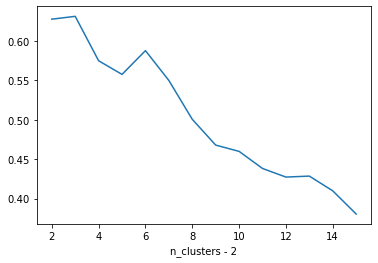

In [133]:
# just out of interest, 2 best
def nbc(n_clusters):
    km = KMeans(n_clusters=n_clusters)
    cluster_labels = km.fit_predict(X)
    return silhouette_score(X, cluster_labels)

n_clusters = np.arange(2, 16)

silhouettes = []
for n in n_clusters:
    silhouettes.append(nbc(n))

plt.plot(n_clusters, silhouettes)
plt.xlabel("n_clusters - 2")
plt.show()

In [134]:
km = KMeans(n_clusters=2, init = 'k-means++', n_init = 20) # init to choose initialisation, n_init runs 10 times
km.fit(X_scaled)

KMeans(n_clusters=2, n_init=20)

In [136]:
km.cluster_centers_

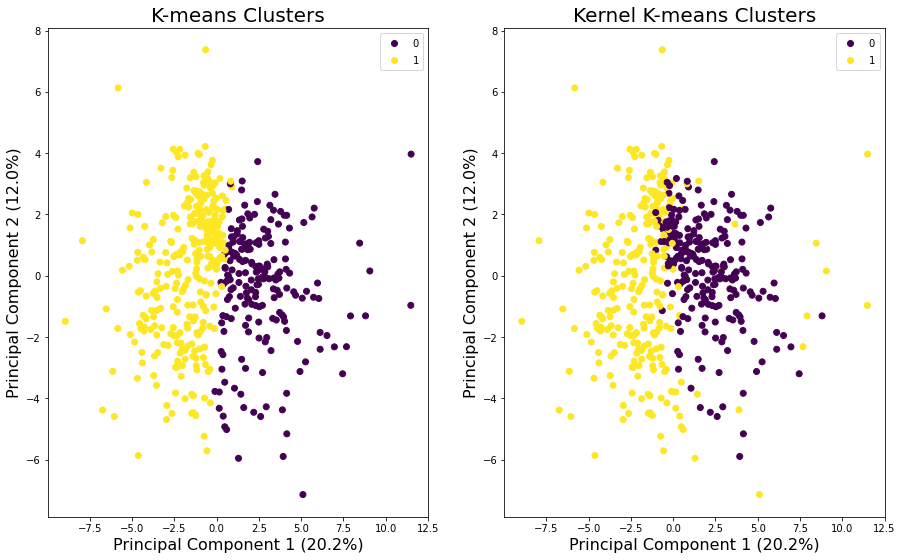

In [161]:
# kernel PCA?
pca = PCA(n_components=2)
pca.fit(X_scaled)

df_pca = pd.DataFrame(pca.transform(X_scaled))
df_pca["cluster label"] = km.predict(X_scaled)

#sns.pairplot(df, hue="cluster label")
fig, axs = plt.subplots(1, 2, figsize=(15,9))
scatter = axs[0].scatter(df_pca.iloc[:,0], df_pca.iloc[:,1], c = df_pca.iloc[:,2]) #[['cluster 1'], ['cluster 2']]
axs[0].legend(*scatter.legend_elements())
axs[0].set_title('K-means Clusters', fontsize = 20)
axs[0].set_xlabel('Principal Component 1 (20.2%)', fontsize = 16)
axs[0].set_ylabel('Principal Component 2 (12.0%)', fontsize = 16)

scatter1 = axs[1].scatter(df_pca1.iloc[:,0], df_pca1.iloc[:,1], c = df_pca1.iloc[:,2]) #[['cluster 1'], ['cluster 2']]
axs[1].legend(*scatter1.legend_elements())
axs[1].set_title('Kernel K-means Clusters', fontsize = 20)
axs[1].set_xlabel('Principal Component 1 (20.2%)', fontsize = 16)
axs[1].set_ylabel('Principal Component 2 (12.0%)', fontsize = 16)
fig.savefig('pca1.pdf')
#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="x", color='k')
plt.show()

In [138]:
pca.explained_variance_ratio_*100

array([20.22123196, 11.98979654])

In [163]:
df_pca["cluster label"].value_counts()

1    302
0    198
Name: cluster label, dtype: int64

In [164]:
df_kk['x'].value_counts()

1    264
0    236
Name: x, dtype: int64

In [166]:
(df_pca["cluster label"] == df_kk['x']).value_counts()

True     416
False     84
dtype: int64

## Kernel K-means

In [158]:
# importe from R, code:
# df = read.csv("01338546_cw2.csv",header=TRUE)
# head(df)
# X = df[2:40]
# summary(X)
# X_scaled = scale(X)
# cluster = kkmeans(X_scaled, centers = 2, kernel = "rbfdot", alg = "kkmeans")
# labels = cluster@.Data
# write.csv(labels, "kkmeans.csv")
df_kk = pd.read_csv('kkmeans.csv')
df_kk['x'] = df_kk['x'] - 1

In [159]:
df_kk['x'] = df_kk['x'].map({0: 1, 1: 0})
df_kk

,Unnamed: 0,x
0,1,1
1,2,0
2,3,1
3,4,1
4,5,0
...,...,...
495,496,0
496,497,0
497,498,1
498,499,1


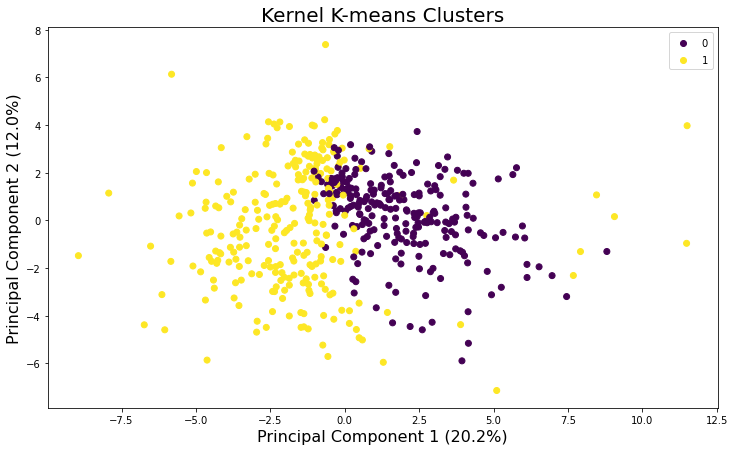

In [160]:
df_pca1 = pd.DataFrame(pca.transform(X_scaled))
df_pca1["cluster label"] = df_kk.iloc[:,1]

#sns.pairplot(df, hue="cluster label")
fig, ax = plt.subplots(figsize=(12,7))
scatter = ax.scatter(df_pca1.iloc[:,0], df_pca1.iloc[:,1], c = df_pca1.iloc[:,2]) #[['cluster 1'], ['cluster 2']]
ax.legend(*scatter.legend_elements())
ax.set_title('Kernel K-means Clusters', fontsize = 20)
ax.set_xlabel('Principal Component 1 (20.2%)', fontsize = 16)
ax.set_ylabel('Principal Component 2 (12.0%)', fontsize = 16)
plt.savefig('pca1.pdf')
#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="x", color='k')
plt.show()

In [144]:
pca.explained_variance_ratio_*100

array([20.22123196, 11.98979654])

# Part B


## B1

## Lasso Regression

Train/Test Split, lasso + random forests deal w multicollinearity (sparsity, random)

In [224]:
y = df.iloc[:,0] 
y.shape

(500,)

In [225]:
X = df.iloc[:, 1:] # use unscaled data, later scaled individually
TEST_SIZE = 0.2 ## use research heuristic methods to choose this value
#SEED = 10 # reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE) # , random_state=SEED

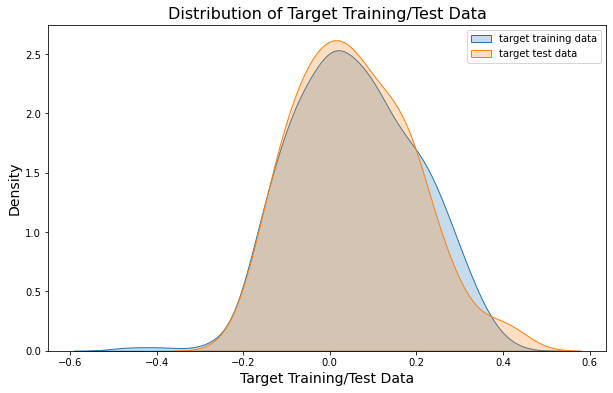

In [305]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.kdeplot(y_train,  fill = True, label = 'target training data')
ax = sns.kdeplot(y_test,  fill = True, label = 'target test data')
ax.set_ylabel("Density", fontsize = 14)
ax.set_xlabel("Target Training/Test Data", fontsize = 14)
ax.set_title("Distribution of Target Training/Test Data", fontsize = 16)
plt.savefig('tt.pdf')
ax.legend()

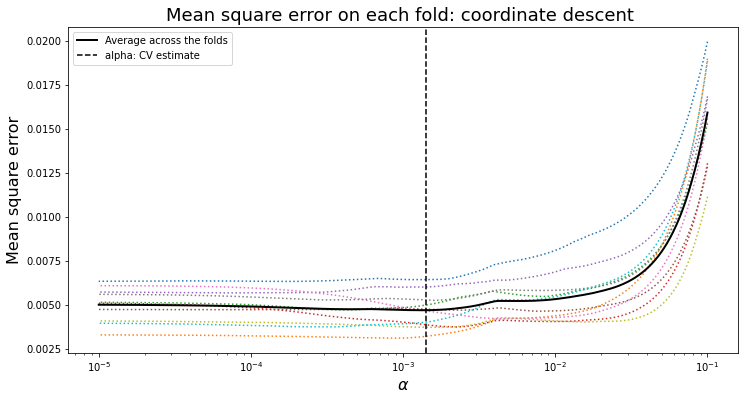

In [171]:
# train lasso model
alphas = np.logspace(-5,-1,1000)
start_time = time.time()
## k = 10 chosen as not too comp exp w small dataset, not too high for overfitting
model = make_pipeline(StandardScaler(), LassoCV(cv=10, alphas=alphas)).fit(X_train, y_train) # scaled separately
fit_time = time.time() - start_time

#ymin, ymax = 2300, 3800
lasso = model[-1]
fig, ax = plt.subplots(figsize = (12,6))
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

#plt.ylim(ymin, ymax)
plt.xlabel(r"$\alpha$", fontsize = 16)
plt.ylabel("Mean square error", fontsize = 16)
plt.legend()
_ = plt.title(
    "Mean square error on each fold: coordinate descent ", fontsize = 18) # (train time: {fit_time:.2f}s)
plt.savefig('ls.pdf')

# acknowledge many parameters choosings inc cv exist, using this to show optimisation method 
# alpha range deemed subsequently sufficient due to rise
# nested cv used to automatically choose k folds, treats it as hyperparameter itself, avoids bias associated with tuning and selecting model
# based on same cv procedure i.e. prevents overfitting
# k folds choose test set within training set, separate from held-out test set

In [309]:
model[-1].alpha_

0.000707701066118189

In [176]:
# # standardised versions of training and test sets
scaler = StandardScaler()

X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.fit_transform(X_test)
# tuned_lasso = LassoCV(cv=10, alphas=alphas).fit(X_train, y_train)

### Random Forests

In [178]:
# oob error for max_features and max_leaf_nodes, min_samples_leaf inferred by this, 
# subsequently inc n_estimators (won't overfit)
from sklearn import ensemble
mtrys = list(range(3, X_train.shape[1], 1))
maxnodes = list(range(30, 125, 15))

oob_scores = np.zeros((len(mtrys), len(maxnodes)))

print('Training models...')
for i, mtry in enumerate(mtrys):
    for j, maxnode in enumerate(maxnodes):
        model1 = ensemble.RandomForestRegressor(oob_score=True, max_features=mtry, max_leaf_nodes=maxnode) # , random_state=SEED
        model1.fit(X_train, y_train)
        oob_scores[i, j] = mean_squared_error(model1.oob_prediction_, y_train)
print('Finished!')

idx_mtry, idx_maxnode = np.unravel_index(np.argmin(oob_scores), oob_scores.shape)
print(idx_mtry, idx_maxnode)

Training models...
Finished!
32 5


In [312]:
mtrys[idx_mtry]

35

In [313]:
maxnodes[idx_maxnode]

120

In [179]:
mtry = mtrys[idx_mtry]
maxnode = maxnodes[idx_maxnode] 
def train_pred_mse(model, train_X, train_y, test_X, test_y):
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    return mean_squared_error(pred_y, test_y)

def train_pred_mae(model, train_X, train_y, test_X, test_y):
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    return mean_absolute_error(pred_y, test_y)

default_model = ensemble.RandomForestRegressor() #random_state=SEED
default_mse = train_pred_mse(default_model, X_train, y_train, X_test, y_test)
default_mae = train_pred_mae(default_model, X_train, y_train, X_test, y_test)

tuned_model1 = ensemble.RandomForestRegressor(max_features=mtry, max_leaf_nodes=maxnode) # , random_state=SEED
tuned_mse1 = train_pred_mse(tuned_model1, X_train, y_train, X_test, y_test)

print(f'Tuned model MSE: {round(tuned_mse1, 8)}')
print(f'Default model MSE: {round(default_mse, 8)}')

Tuned model MSE: 0.00380666
Default model MSE: 0.0037556


In [315]:
# now vary number of trees
ntrees = list(range(100, X_train.shape[0], 50))
oob_scores1 = np.zeros((len(ntrees)))

print('Training models...')
for i, ntree in enumerate(ntrees):
    model2 = ensemble.RandomForestRegressor(n_estimators=ntree, oob_score=True, max_features=mtry, max_leaf_nodes=maxnode) # , random_state=SEED
    model2.fit(X_train, y_train)
    oob_scores1[i] = mean_squared_error(model2.oob_prediction_, y_train)
print('Finished!')

idx_ntree = np.argmin(oob_scores1)#np.unravel_index(np.argmin(oob_scores1), oob_scores1.shape)
print(idx_ntree)

Training models...
Finished!
5


In [316]:
ntree = ntrees[idx_ntree]
ntree

350

In [317]:
default_mae = train_pred_mae(default_model, X_train, y_train, X_test, y_test)
tuned_mae1 = train_pred_mae(tuned_model1, X_train, y_train, X_test, y_test)
tuned_model2 = ensemble.RandomForestRegressor(n_estimators=ntree, max_features=mtry, max_leaf_nodes=maxnode) # , random_state=SEED
tuned_mse2 = train_pred_mse(tuned_model2, X_train, y_train, X_test, y_test)
tuned_mae2 = train_pred_mae(tuned_model2, X_train, y_train, X_test, y_test)


print(f'Default model MSE: {round(default_mse, 8)}')
print(f'Default model MAE: {round(default_mae, 8)}')
print(f'Tuned model1 MSE: {round(tuned_mse1, 8)}')
print(f'Tuned model1 MAE: {round(tuned_mae1, 8)}')
print(f'Tuned model2 MSE: {round(tuned_mse2, 8)}')
print(f'Tuned model2 MAE: {round(tuned_mae2, 8)}')

## Higher MSE???

Default model MSE: 0.00323588
Default model MAE: 0.04285708
Tuned model1 MSE: 0.00318705
Tuned model1 MAE: 0.04348848
Tuned model2 MSE: 0.00326123
Tuned model2 MAE: 0.04343347


In [97]:
tuned_model2.fit(X_train, y_train)

RandomForestRegressor(max_features=35, max_leaf_nodes=75, n_estimators=200)

In [184]:
from sklearn.inspection import permutation_importance
from scipy.stats import spearmanr

impurity_importances = tuned_model1.feature_importances_

mse_importances = permutation_importance(
    tuned_model1, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
).importances_mean

# Normalise
mse_importances = mse_importances / mse_importances.sum()
impurity_importances = impurity_importances / impurity_importances.sum()

correl = round(spearmanr(impurity_importances, mse_importances).correlation, 4)

df1 = pd.DataFrame.from_dict({
    'variable': df.columns[1:],
    '%IncMSE': mse_importances,
    'IncNodePurity': impurity_importances
})
df1 = df1.set_index('variable')
df1 = df1.sort_index()

df1.plot.bar()
plt.xlabel('variable')
plt.ylabel('normalised_importance')
plt.title(f'Spearman correl: {correl}')
plt.xticks(rotation=45)
plt.show()

Elapsed time to compute the importances: 7.120 seconds


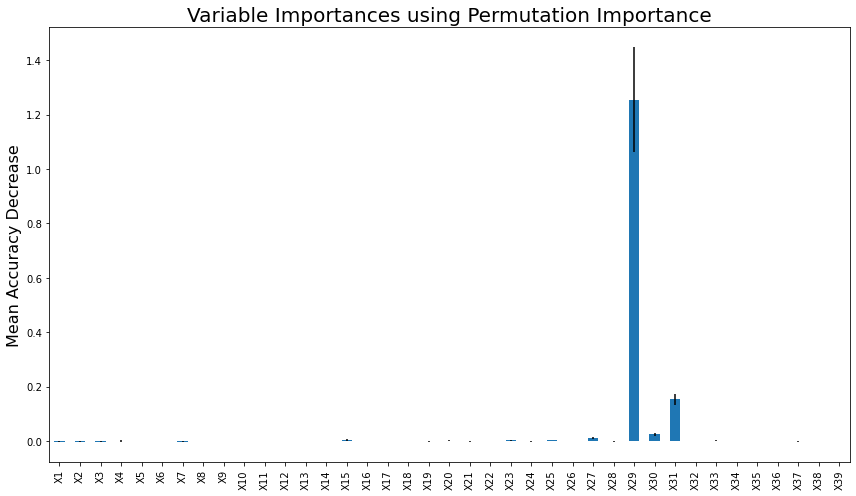

In [187]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    tuned_model1, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=df.columns[1:]) # , index=feature_names
fig, ax = plt.subplots(figsize=(12,7))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Variable Importances using Permutation Importance", fontsize = 20)
ax.set_ylabel("Mean Accuracy Decrease", fontsize = 16)
fig.tight_layout()
plt.savefig('vi1.pdf')
plt.show()

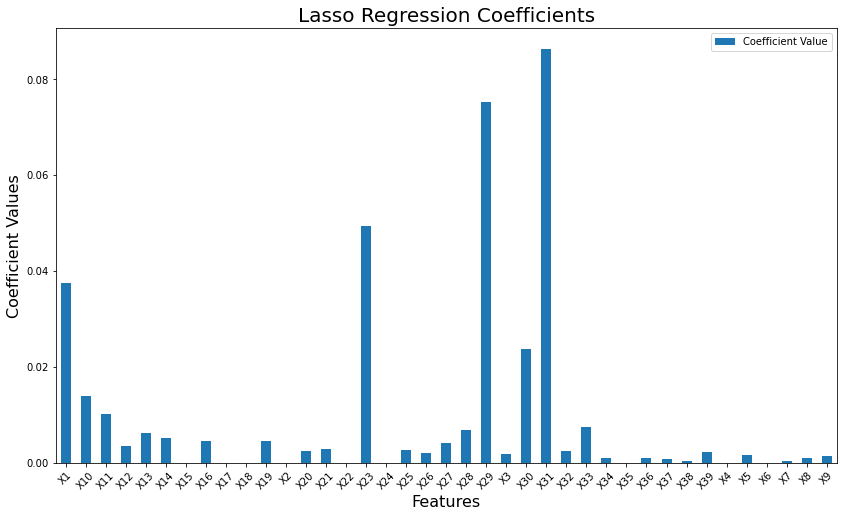

In [320]:
# lasso coef already normalised for comparison
df2 = pd.DataFrame.from_dict({
    'variable': df.columns[1:],
    'Coefficient Value': abs(model[-1].coef_)
})
df2 = df2.set_index('variable')
df2 = df2.sort_index()

#fig, ax = plt.subplots(figsize=(12,7))
df2.plot.bar(figsize=(14,8))
plt.xlabel('Features', fontsize = 16)
plt.ylabel('Coefficient Values', fontsize = 16)
plt.title('Lasso Regression Coefficients', fontsize = 20)
plt.xticks(rotation=45)
plt.savefig('vi2.pdf')
plt.show()

In [228]:
# comparing variable importance
model[-1].coef_

array([ 0.01797116,  0.        , -0.00351231,  0.        , -0.00122569,
        0.        ,  0.        ,  0.        , -0.        , -0.00194045,
       -0.00413356, -0.        , -0.01469357,  0.        , -0.        ,
        0.00734592, -0.        ,  0.        , -0.00577256, -0.        ,
        0.        ,  0.        , -0.02884964, -0.        , -0.00058307,
        0.        ,  0.        ,  0.00905955,  0.07470538, -0.01822946,
       -0.07029846, -0.00719333, -0.00469087, -0.00516177,  0.        ,
        0.00098714, -0.        ,  0.00237805,  0.00204281])

### Prediction Performance

In [329]:
# fix up when cleared some code
mse_lasso = mean_squared_error(tuned_lasso.predict(X_test), y_test)
#mse_lasso # slightly worse than RF
mae_lasso = mean_absolute_error(tuned_lasso.predict(X_test), y_test)
#mae_lasso 

print(f'Tuned model LASSO MSE: {round(mse_lasso, 8)}')
print(f'Tuned model LASSO MAE: {round(mae_lasso, 8)}')
print(f'Tuned model RF MSE: {round(tuned_mse2, 8)}')
print(f'Tuned model RF MAE: {round(tuned_mae2, 8)}')
# oob_mse = mean_squared_error(tuned_model1.fit(X_train,y_train).oob_prediction_,y_train)
# print(f'Tuned model OOB: {round(oob_mse, 8)}')

Tuned model LASSO MSE: 0.00520462
Tuned model LASSO MAE: 0.05654021
Tuned model RF MSE: 0.00326123
Tuned model RF MAE: 0.04343347


## B2

* create 10/100 random reproducible seeds

* run lasso hyp tuning loop for all seeds

* plot mse over iterations

* check number of zero columns, graph

* run rf tuning loop for all seeds

* plot mse over iterations

* graph avg VI

In [221]:
lasso

LassoCV(alphas=array([1.00000000e-05, 1.00926219e-05, 1.01861017e-05, 1.02804473e-05,
       1.03756668e-05, 1.04717682e-05, 1.05687597e-05, 1.06666496e-05,
       1.07654461e-05, 1.08651577e-05, 1.09657929e-05, 1.10673602e-05,
       1.11698682e-05, 1.12733256e-05, 1.13777413e-05, 1.14831241e-05,
       1.15894830e-05, 1.16968270e-05, 1.18051653e-05, 1.19145070e-05,
       1.20248614e-05, 1.21362380e-0...
       8.08924349e-02, 8.16416760e-02, 8.23978568e-02, 8.31610415e-02,
       8.39312950e-02, 8.47086827e-02, 8.54932707e-02, 8.62851257e-02,
       8.70843150e-02, 8.78909065e-02, 8.87049689e-02, 8.95265713e-02,
       9.03557835e-02, 9.11926760e-02, 9.20373200e-02, 9.28897872e-02,
       9.37501502e-02, 9.46184819e-02, 9.54948564e-02, 9.63793480e-02,
       9.72720319e-02, 9.81729841e-02, 9.90822810e-02, 1.00000000e-01]),
        cv=10)

In [226]:
model_t = make_pipeline(StandardScaler(), LassoCV(cv=10, alphas=alphas)).fit(X_train, y_train) # scaled separately

#ymin, ymax = 2300, 3800
lasso = model_t[-1]

In [229]:
X_train1 = X_train.to_numpy().reshape(-1, 1)

y_train1 = np.squeeze(y_train.to_numpy())

In [3]:
# # resample training test split, seed
# from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

# # Number of random trials
# NUM_TRIALS = 3
# #alphas = np.logspace(-4,-1,50) # reduce number parameters for nested cv
# alphas = np.logspace(-4, -0.5, 30)

# # Set up possible values of parameters to optimize over
# p_grid = {"alphas": alphas}

# #svm = SVC(kernel="rbf")

# # Arrays to store scores
# non_nested_scores = np.zeros(NUM_TRIALS)
# nested_scores = np.zeros(NUM_TRIALS)

# # Loop for each trial
# for i in range(NUM_TRIALS):

#     # Choose cross-validation techniques for the inner and outer loops,
#     # independently of the dataset.
#     # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
#     inner_cv = KFold(n_splits=10, shuffle=True, random_state=i)
#     outer_cv = KFold(n_splits=5, shuffle=True, random_state=i)

#     # Non_nested parameter search and scoring
#     clf = GridSearchCV(estimator=lasso, param_grid=p_grid, cv=outer_cv) 
#     clf.fit(X_train1, y_train1)
#     non_nested_scores[i] = clf.best_score_

#     # Nested CV with parameter optimization
#     clf = GridSearchCV(estimator=lasso, param_grid=p_grid, cv=inner_cv)
#     nested_score = cross_val_score(clf, X=X_train1, y=y_train1, cv=outer_cv)
#     nested_scores[i] = nested_score.mean()

# score_difference = non_nested_scores - nested_scores

# print(
#     "Average difference of {:6f} with std. dev. of {:6f}.".format(
#         score_difference.mean(), score_difference.std()
#     )
# )

# # Plot scores on each trial for nested and non-nested CV
# plt.figure()
# plt.subplot(211)
# (non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
# (nested_line,) = plt.plot(nested_scores, color="b")
# plt.ylabel("score", fontsize="14")
# plt.legend(
#     [non_nested_scores_line, nested_line],
#     ["Non-Nested CV", "Nested CV"],
#     bbox_to_anchor=(0, 0.4, 0.5, 0),
# )
# plt.title(
#     "Non-Nested and Nested Cross Validation on Iris Dataset",
#     x=0.5,
#     y=1.1,
#     fontsize="15",
# )

# # Plot bar chart of the difference.
# plt.subplot(212)
# difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
# plt.xlabel("Individual Trial #")
# plt.legend(
#     [difference_plot],
#     ["Non-Nested CV - Nested CV Score"],
#     bbox_to_anchor=(0, 1, 0.8, 0),
# )
# plt.ylabel("score difference", fontsize="14")

# plt.show()

In [4]:
# from sklearn.datasets import load_iris
# from matplotlib import pyplot as plt
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
# import numpy as np

# # Number of random trials
# NUM_TRIALS = 3


# # Set up possible values of parameters to optimize over
# p_grid = {"alphas": [alphas]}

# # We will use a Support Vector Classifier with "rbf" kernel

# # Arrays to store scores
# non_nested_scores = np.zeros(NUM_TRIALS)
# nested_scores = np.zeros(NUM_TRIALS)

# # Loop for each trial
# for i in range(NUM_TRIALS):

#     # Choose cross-validation techniques for the inner and outer loops,
#     # independently of the dataset.
#     # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
#     inner_cv = KFold(n_splits=10, shuffle=True, random_state=i)
#     outer_cv = KFold(n_splits=5, shuffle=True, random_state=i)

#     # Non_nested parameter search and scoring
#     clf = GridSearchCV(estimator=lasso, param_grid=p_grid, cv=outer_cv)
#     clf.fit(X_train, y_train)
#     non_nested_scores[i] = clf.best_score_

#     # Nested CV with parameter optimization
#     clf = GridSearchCV(estimator=lasso, param_grid=p_grid, cv=inner_cv)
#     nested_score = cross_val_score(clf, X=X_train, y=y_train, cv=outer_cv)
#     nested_scores[i] = nested_score.mean()

# score_difference = non_nested_scores - nested_scores

# print(
#     "Average difference of {:6f} with std. dev. of {:6f}.".format(
#         score_difference.mean(), score_difference.std()
#     )
# )

# # Plot scores on each trial for nested and non-nested CV
# plt.figure()
# plt.subplot(211)
# (non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
# (nested_line,) = plt.plot(nested_scores, color="b")
# plt.ylabel("score", fontsize="14")
# plt.legend(
#     [non_nested_scores_line, nested_line],
#     ["Non-Nested CV", "Nested CV"],
#     bbox_to_anchor=(0, 0.4, 0.5, 0),
# )
# plt.title(
#     "Non-Nested and Nested Cross Validation on Iris Dataset",
#     x=0.5,
#     y=1.1,
#     fontsize="15",
# )

# # Plot bar chart of the difference.
# plt.subplot(212)
# difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
# plt.xlabel("Individual Trial #")
# plt.legend(
#     [difference_plot],
#     ["Non-Nested CV - Nested CV Score"],
#     bbox_to_anchor=(0, 1, 0.8, 0),
# )
# plt.ylabel("score difference", fontsize="14")

# plt.show()

In [355]:

from sklearn.datasets import load_iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

In [363]:
type(y_train.to_numpy())

numpy.ndarray

In [114]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso


# lasso = Lasso(random_state=0, max_iter=10000)
# alphas = np.logspace(-4, -0.5, 30)

# tuned_parameters = [{"alpha": alphas}]
# n_folds = 5

# clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
# clf.fit(X_train, y_train)
# scores = clf.cv_results_["mean_test_score"]
# scores_std = clf.cv_results_["std_test_score"]
# plt.figure().set_size_inches(8, 6)
# plt.semilogx(alphas, scores)

# # plot error lines showing +/- std. errors of the scores
# std_error = scores_std / np.sqrt(n_folds)

# plt.semilogx(alphas, scores + std_error, "b--")
# plt.semilogx(alphas, scores - std_error, "b--")

# # alpha=0.2 controls the translucency of the fill color
# plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

# plt.ylabel("CV score +/- std error")
# plt.xlabel("alpha")
# plt.axhline(np.max(scores), linestyle="--", color=".5")
# plt.xlim([alphas[0], alphas[-1]])

# # #############################################################################
# # Bonus: how much can you trust the selection of alpha?

# # To answer this question we use the LassoCV object that sets its alpha
# # parameter automatically from the data by internal cross-validation (i.e. it
# # performs cross-validation on the training data it receives).
# # We use external cross-validation to see how much the automatically obtained
# # alphas differ across different cross-validation folds.
# # lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
# # k_fold = KFold(3)

# # print("Answer to the bonus question:", "how much can you trust the selection of alpha?")
# # print()
# # print("Alpha parameters maximising the generalization score on different")
# # print("subsets of the data:")
# # for k, (train, test) in enumerate(k_fold.split(X_train, y_train)):
# #     lasso_cv.fit(X_train[train], y_train[train])
# #     print(
# #         "[fold {0}] alpha: {1:.5f}, score: {2:.5f}".format(
# #             k, lasso_cv.alpha_, lasso_cv.score(X_train[test], y_train[test])
# #         )
# #     )
# # print()
# # print("Answer: Not very much since we obtained different alphas for different")
# # print("subsets of the data and moreover, the scores for these alphas differ")
# # print("quite substantially.")

# plt.show()

In [172]:
TEST_SIZE = 0.2 ## use research heuristic methods to choose this value
seeds = np.arange(1,50)
alphas = np.logspace(-4,-1,100) # reduced
mse_lasso = []
vi_lasso = []
for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=seed) 
    X_train_ = scaler.fit_transform(X_train)
    X_test_ = scaler.fit_transform(X_test)
    tuned_lasso = LassoCV(cv=20, alphas=alphas).fit(X_train, y_train) # inc folds
    mse_lasso.append(mean_squared_error(tuned_lasso.predict(X_test), y_test))
    vi_lasso.append(len(tuned_lasso.coef_) - np.count_nonzero(tuned_lasso.coef_))

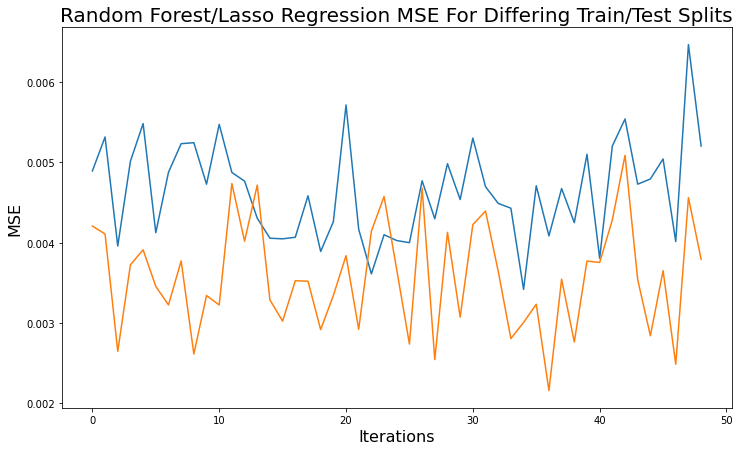

In [190]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(mse_lasso)
ax.plot(mse_rf)
#axs[1].plot(vi_lasso)
#ax.set_ylim([0.002, 0.007])
ax.set_xlabel('Iterations', fontsize = 16)
ax.set_ylabel('MSE', fontsize = 16)
ax.set_title('Random Forest/Lasso Regression MSE For Differing Train/Test Splits', fontsize = 20)
plt.savefig('tt1.pdf')

In [129]:
#np.std(mse_lasso)/np.mean(mse_lasso)*100

13.09693694571428

In [188]:
TEST_SIZE = 0.2 ## use research heuristic methods to choose this value, separate from B2, large value used for accurate cv
seeds = np.arange(1,50)
mse_rf = []
vi_rf = result.importances_mean
for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=seed) 
    X_train_ = scaler.fit_transform(X_train)
    X_test_ = scaler.fit_transform(X_test)
    
    mtrys = list(range(3, X_train.shape[1], 3)) # reduced
    maxnodes = list(range(30, 125, 30)) # reduced, no n_estimators tuning
    oob_scores = np.zeros((len(mtrys), len(maxnodes)))
    for i, mtry in enumerate(mtrys):
        for j, maxnode in enumerate(maxnodes):
            model1 = ensemble.RandomForestRegressor(oob_score=True, max_features=mtry, max_leaf_nodes=maxnode) # , random_state=SEED
            model1.fit(X_train, y_train)
            oob_scores[i, j] = mean_squared_error(model1.oob_prediction_, y_train)
    idx_mtry, idx_maxnode = np.unravel_index(np.argmin(oob_scores), oob_scores.shape)
    mtry = mtrys[idx_mtry] 
    maxnode = maxnodes[idx_maxnode]
    tuned_model = ensemble.RandomForestRegressor(max_features=mtry, max_leaf_nodes=maxnode) # , random_state=SEED
    tuned_mse = train_pred_mse(tuned_model, X_train, y_train, X_test, y_test)
    mse_rf.append(tuned_mse)
    
    result = permutation_importance(
    tuned_model, X_test, y_test, n_repeats=5, random_state=42, n_jobs=2 # keep this constant
    )
    vi_rf = (vi_rf + result.importances_mean)/2

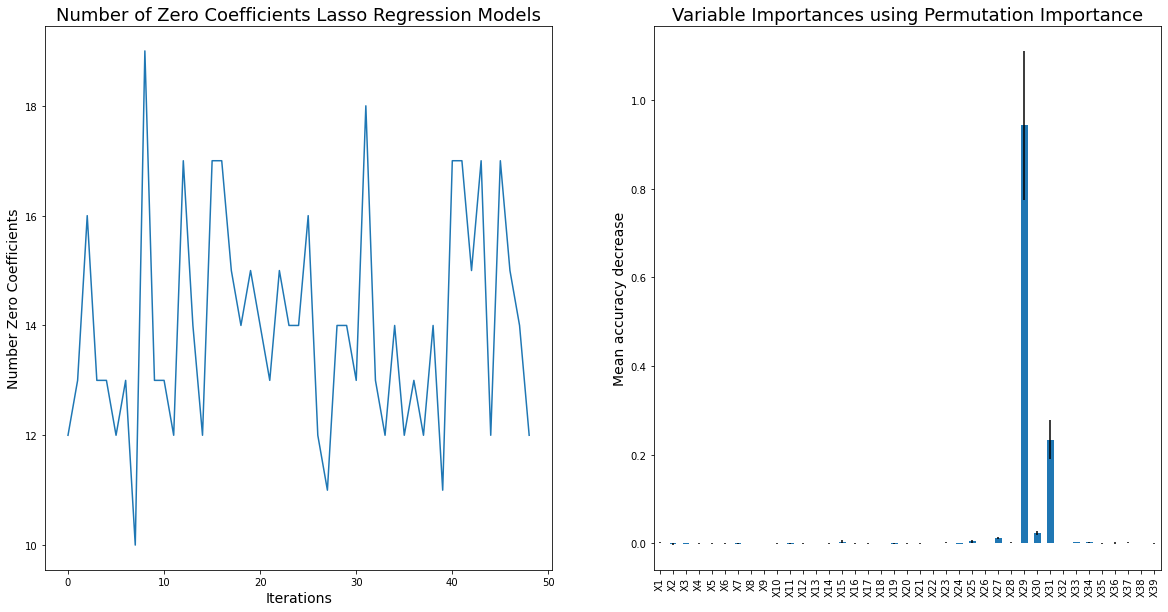

In [189]:
forest_importances = pd.Series(vi_rf, index=df.columns[1:])
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].plot(vi_lasso)
axs[0].set_xlabel('Iterations', fontsize = 14)
axs[0].set_ylabel('Number Zero Coefficients', fontsize = 14)
axs[0].set_title('Number of Zero Coefficients Lasso Regression Models', fontsize = 18)

axs[1].set_title("Variable Importances using Permutation Importance", fontsize = 18)
forest_importances.plot.bar(yerr=result.importances_std, ax=axs[1])
axs[1].set_ylabel("Mean accuracy decrease", fontsize = 14)
fig.savefig('tt2.pdf')
#fig.tight_layout()

In [192]:
np.std(mse_lasso)

0.0006077449538819948

In [193]:
np.std(mse_rf)

0.0006786681353992148

In [194]:
np.std(vi_lasso)

2.0252467314375964

# Question 2
## 1. 
Could link sparse coefficients from lasso to this section

In [262]:
df = pd.read_csv("dataQ2.2.csv")
df.sample(5)

,t,d,temp
245,36,11,12.857893
70,32,2,12.135400
251,1,12,9.743014
116,6,5,12.801835
268,49,12,10.280970


In [236]:
df.describe()

,t,d,temp
count,400.000000,400.000000,400.000000
mean,25.702500,9.027500,10.682293
std,14.735394,6.024324,2.406456
min,1.000000,0.000000,3.579590
25%,12.000000,3.000000,9.010004
50%,26.000000,9.000000,10.681843
75%,38.250000,14.000000,12.626846
max,50.000000,19.000000,15.374182


In [19]:
df['d'].value_counts(ascending=False)

0     39
9     23
3     22
14    21
1     21
10    21
19    21
8     20
11    20
2     20
16    20
17    20
7     18
5     18
12    18
18    17
6     16
13    16
15    16
4     13
Name: d, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       400 non-null    int64  
 1   d       400 non-null    int64  
 2   temp    400 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 9.5 KB


In [263]:
df1 = df[df['d']==0]
df1.shape

(39, 3)

* 39 days at d = 0, roughly 1 month, spans max 50 days, would not expect periodic trend rather linear up/down depending on time of year
* use zero mean prior after scaling as have no prior information 

In [264]:
class Kernel:
    """Base class for kernels"""

    def __add__(self, kernel2: Kernel):
        return SumKernel([self, kernel2])

    def __mul__(self, kernel2: Kernel):
        return ProductKernel([self, kernel2])


class SumKernel:
    """Kernel to enable summation of kernels"""

    def __init__(self, kernels: List[Kernel]) -> None:
        self.kernels = kernels

    def __call__(self, X: np.ndarray, X2: np.ndarray = None) -> np.ndarray:
        return np.sum([k(X, X2) for k in self.kernels], axis=0)


class ProductKernel:
    """Kernel to enable product of kernels"""

    def __init__(self, kernels: List[Kernel]) -> None:
        self.kernels = kernels

    def __call__(self, X: np.ndarray, X2: np.ndarray = None) -> np.ndarray:
        return np.prod([k(X, X2) for k in self.kernels], axis=0)


class RBF(Kernel):
    def __init__(
        self, sigma_f: np.float64 = 1.0, lengthscale: np.float64 = 1.0
    ) -> None:
        self.sigma_f = sigma_f
        self.lengthscale = lengthscale

    def __call__(self, X: np.ndarray, X2: np.ndarray = None) -> np.ndarray:
        """
        Calculate a kernel matrix using the RBF kernel

        Args:
        - X: matrix with shape n1 x 1
        - X2: matrix with shape n2 x 1 or None (default), in which case X2=X

        Returns: n1 x n2 kernel matrix
        """

        if X2 is None:
            X2 = X

        # we make use of broadcasting to compute the pairwise difference
        # between each element of X and X2
        diff = (X[:, None, 0] - X2[None, :, 0]) ** 2
        K = self.sigma_f ** 2 * np.exp(-diff / (2 * self.lengthscale ** 2))
        return K


class PeriodicKernel(Kernel):
    def __init__(
        self,
        sigma_f: np.float64 = 1.0,
        lengthscale: np.float64 = 1.0,
        period: np.float64 = 1.0,
    ) -> None:
        self.sigma_f = sigma_f
        self.lengthscale = lengthscale
        self.period = period

    def __call__(self, X: np.ndarray, X2: np.ndarray = None) -> np.ndarray:
        """
        Calculate a kernel matrix using the periodic kernel function

        Args:
        - X: matrix with shape n1 x 1
        - X2: matrix with shape n2 x 1 or None (default), in which case X2=X

        Returns: n1 x n2 kernel matrix
        """

        if X2 is None:
            X2 = X

        # we make use of broadcasting to compute the pairwise difference
        # between each element of X and X2
        diff = np.abs(X[:, None, 0] - X2[None, :, 0])
        K = -2 * np.sin(np.pi * diff / self.period) ** 2
        K = self.sigma_f ** 2 * np.exp(K / self.lengthscale ** 2)
        return K


In [38]:
rbf = RBF()
rbf.sigma_f

1.0

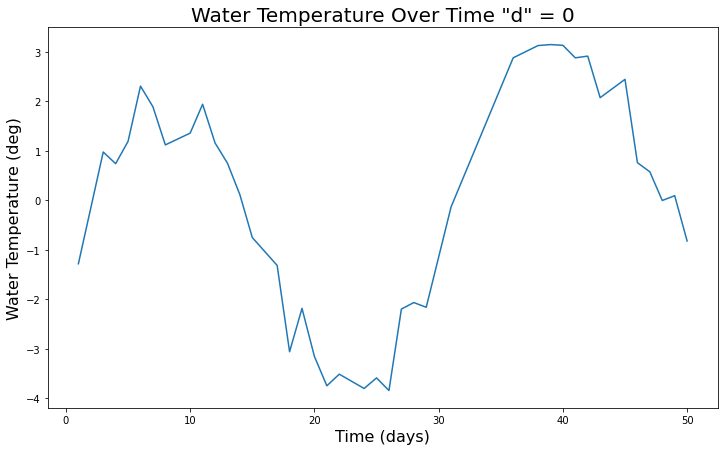

In [265]:
X = df1["t"].values[:, None]
y = df1["temp"].values[:, None]
mean_y = np.mean(y)
y -= mean_y

fig, ax =plt.subplots(figsize=(12,7))
ax.plot(X, y)
ax.set_title('Water Temperature Over Time "d" = 0', fontsize = 20)
ax.set_xlabel('Time (days)', fontsize = 16)
ax.set_ylabel('Water Temperature (deg)', fontsize = 16)
plt.savefig('q2.pdf')

perhaps periodic kernel may suit

In [200]:
# default hyperparameters
kernel_functions = [
    # RBF kernel
    RBF(sigma_f=1.0, lengthscale=1.0),
    # periodic kernel
    PeriodicKernel(sigma_f=1.0, lengthscale=1.0, period=1.0),
    # RBF x Periodic
    RBF(sigma_f=1, lengthscale=1.0)
    * PeriodicKernel(sigma_f=1.0, lengthscale=1.0, period=1.0),
]

In [201]:
SIGMA_N = 1.0 # optimize


def fit_gp_posterior(
    X: np.ndarray, y: np.ndarray, X_star: np.ndarray, kernel: Kernel, sigma_n: float
) -> Tuple[np.ndarray]:
    """Returns the mean and variance of the GP posterior
    for data (X,y) and kernel function k_fn at test points X*
    sigma_n is the noise std
    """
    Kff = kernel(X)  # K(X,X)
    Kffs = kernel(X, X_star)  # K(X,X*)
    Kfsfs = kernel(X_star)  # K(X*,X*)

    # calculate posterior
    sigma_n_sq = sigma_n ** 2
    f_mean = Kffs.T @ np.linalg.solve(Kff + sigma_n_sq * np.eye(Kff.shape[0]), y)
    f_cov = Kfsfs - Kffs.T @ np.linalg.solve(
        Kff + sigma_n_sq * np.eye(Kff.shape[0]), Kffs
    )

    return f_mean, f_cov


def log_marg_likelihood(
    X: np.ndarray, y: np.ndarray, kernel: Kernel, sigma_n: float
) -> float:
    Kff = kernel(X)  # K(X,X)
    A = Kff + sigma_n ** 2 * np.eye(Kff.shape[0])
    lml = -0.5 * (
        y.T @ np.linalg.solve(A, y)
        + np.log(np.linalg.det(A) + 1e-9)
        + X.shape[0] * np.log(2 * np.pi)
    )
    return lml[0, 0]


In [209]:
gp_posteriors = [
    fit_gp_posterior(X, y, np.linspace(0, 50, 101)[:, None], kernel, SIGMA_N)
    for kernel in kernel_functions
]

all_lmls = [log_marg_likelihood(X, y, kernel, SIGMA_N) for kernel in kernel_functions]
all_lmls

[-80.50066160418498, -136.25494063742002, -80.50066160418498]

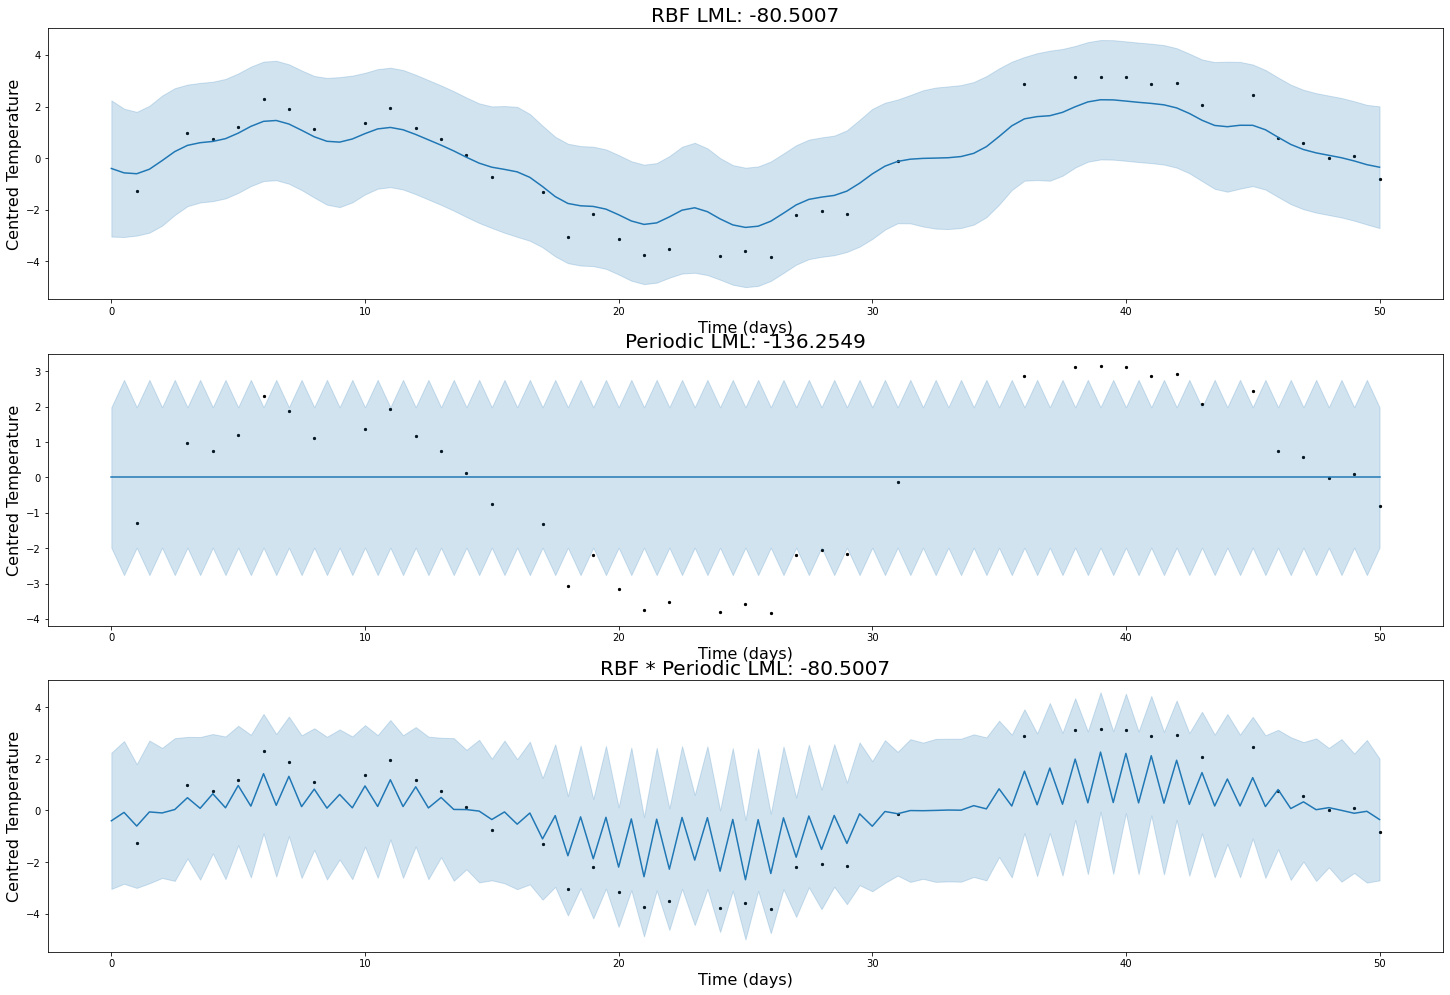

In [207]:
titles = ["RBF", "Periodic", "RBF * Periodic"]
x_plot = np.linspace(0, 50, 101)[:, None]
fig, axs = plt.subplots(3, 1, figsize=(25, 17))
for i, (f_mean, f_cov) in enumerate(gp_posteriors):
    lml = all_lmls[i]
    f_var = np.diag(f_cov)[:, None]
    axs[i].plot(x_plot, f_mean, color="C0")
    axs[i].scatter(X, y, color="black", s=5)
    axs[i].set_xlabel("Time (days)", fontsize = 16)
    axs[i].set_ylabel("Centred Temperature (deg)", fontsize = 16)
    axs[i].set_title(titles[i] + f" LML: {round(lml, 4)}", fontsize = 20)

    # plot the 95% predictive distribution (f_var + likelihood_variance)
    axs[i].fill_between(
        x_plot[:, 0],
        (f_mean - 1.96 * np.sqrt(f_var + SIGMA_N ** 2))[:, 0],
        (f_mean + 1.96 * np.sqrt(f_var + SIGMA_N ** 2))[:, 0],
        color="C0",
        alpha=0.2,
    )
fig.savefig('gp1.pdf')

In [197]:
dist_data = pd.DataFrame(squareform(pdist(X)))
min(dist_data) # Euclidean distance between each entry

0

In [211]:
sigs = np.arange(0.1, 10, 0.1)
lengths = np.arange(0.1, 3, 0.1) # cannot divide by 0
sig_ns = np.arange(0.1,5.1, 0.1)
type(sigs)

numpy.ndarray

In [212]:
temp = all_lmls

In [213]:
all_lmls = []
for sig_n in sig_ns:
    for sig in sigs:
        for leng in lengths:
            kernel_functions = [
                RBF(sigma_f=sig, lengthscale=leng),
                PeriodicKernel(sigma_f=sig, lengthscale=leng, period=1.0), # different period values manually inputted
                RBF(sigma_f=sig, lengthscale=leng)
                * PeriodicKernel(sigma_f=sig, lengthscale=leng, period=1.0),
            ]
            all_lmls.append([log_marg_likelihood(X, y, kernel, sig_n) for kernel in kernel_functions])

Now must extract index of lowest Ml for each model and cross reference with sigs and lengths lists

In [214]:
all_lmls = np.array(all_lmls)
all_lmls.shape

(2838, 3)

In [381]:
np.argmax(all_lmls[:,0]) 

166857

In [387]:
int(all_lmls.shape[0]/len(sig_ns))

37900

In [397]:
np.argmax(all_lmls[:,0]) % int(all_lmls.shape[0]/len(sig_ns)) % len(lengths)

97

In [215]:
## index flattened array to get sigma_f value for min absolute ML value
sig_n_idx_rbf = np.argmax(all_lmls[:,0]) // int(all_lmls.shape[0]/len(sig_ns))
sig_n_idx_rbf

## index flattened array to get sigma_f value for min absolute ML value
sig_idx_rbf = np.argmax(all_lmls[:,0]) % int(all_lmls.shape[0]/len(sig_ns)) // len(lengths) 
sig_idx_rbf

## index flattened array to get length_scale value for min absolute ML value
leng_idx_rbf = np.argmax(all_lmls[:,0]) % int(all_lmls.shape[0]/len(sig_ns)) % len(lengths) 
leng_idx_rbf

## index flattened array to get sigma_f value for min absolute ML value
sig_n_idx_per = np.argmax(all_lmls[:,1]) // int(all_lmls.shape[0]/len(sig_ns))

## index flattened array to get sigma_f value for min absolute ML value
sig_idx_per = np.argmax(all_lmls[:,1]) % int(all_lmls.shape[0]/len(sig_ns)) // len(lengths) 

## index flattened array to get length_scale value for min absolute ML value
leng_idx_per = np.argmax(all_lmls[:,1]) % int(all_lmls.shape[0]/len(sig_ns)) % len(lengths) 

## index flattened array to get sigma_f value for min absolute ML value
sig_n_idx_prod = np.argmax(all_lmls[:,2]) // int(all_lmls.shape[0]/len(sig_ns))

## index flattened array to get sigma_f value for min absolute ML value
sig_idx_prod = np.argmax(all_lmls[:,2]) % int(all_lmls.shape[0]/len(sig_ns)) // len(lengths) 

## index flattened array to get length_scale value for min absolute ML value
leng_idx_prod = np.argmax(all_lmls[:,2]) % int(all_lmls.shape[0]/len(sig_ns)) % len(lengths) 

In [42]:
sig_n_idx_per

4

In [216]:
tuned_kernel_functions = [
    # RBF kernel
    RBF(sigma_f=sigs[sig_idx_rbf], lengthscale=lengths[leng_idx_rbf]),
    # periodic kernel
    PeriodicKernel(sigma_f=sigs[sig_idx_per], lengthscale=lengths[leng_idx_per], period=1.0),
    # RBF x Periodic
    RBF(sigma_f=sigs[sig_idx_prod], lengthscale=lengths[leng_idx_prod])
    * PeriodicKernel(sigma_f=sigs[sig_idx_prod], lengthscale=lengths[leng_idx_prod], period=1.0),
]
ss = [sig_ns[sig_n_idx_rbf], sig_ns[sig_n_idx_per], sig_ns[sig_n_idx_prod]]

In [102]:
ss

[0.5, 2.2, 0.5]

In [268]:
ss = [0.5, 2.2, 0.5]

In [269]:
tuned_kernel_functions = [
    # RBF kernel
    RBF(sigma_f=4, lengthscale=9.8),
    # periodic kernel
    PeriodicKernel(sigma_f=0, lengthscale=0.1, period=1.0),
    # RBF x Periodic
    RBF(sigma_f=2, lengthscale=9.8)
    * PeriodicKernel(sigma_f=2, lengthscale=9.8, period=1.0),
]

In [270]:
gp_posteriors = [
    fit_gp_posterior(X, y, np.linspace(0, 50, 101)[:, None], kernel, s)
    for kernel, s in zip(tuned_kernel_functions, ss)
]

all_lmls1 = [log_marg_likelihood(X, y, kernel, s) for kernel, s in zip(tuned_kernel_functions, ss)]
all_lmls1

[-40.802112594302955, -86.95453450112437, -40.802112594302955]

In [56]:
gp_posteriors = [
    fit_gp_posterior(X, y, np.linspace(0, 50, 101)[:, None], kernel, SIGMA_N)
    for kernel in tuned_kernel_functions
]

all_lmls1 = [log_marg_likelihood(X, y, kernel, SIGMA_N) for kernel in tuned_kernel_functions]
all_lmls1

[-54.988458217584586, -136.83400977140255, -57.239695091115536]

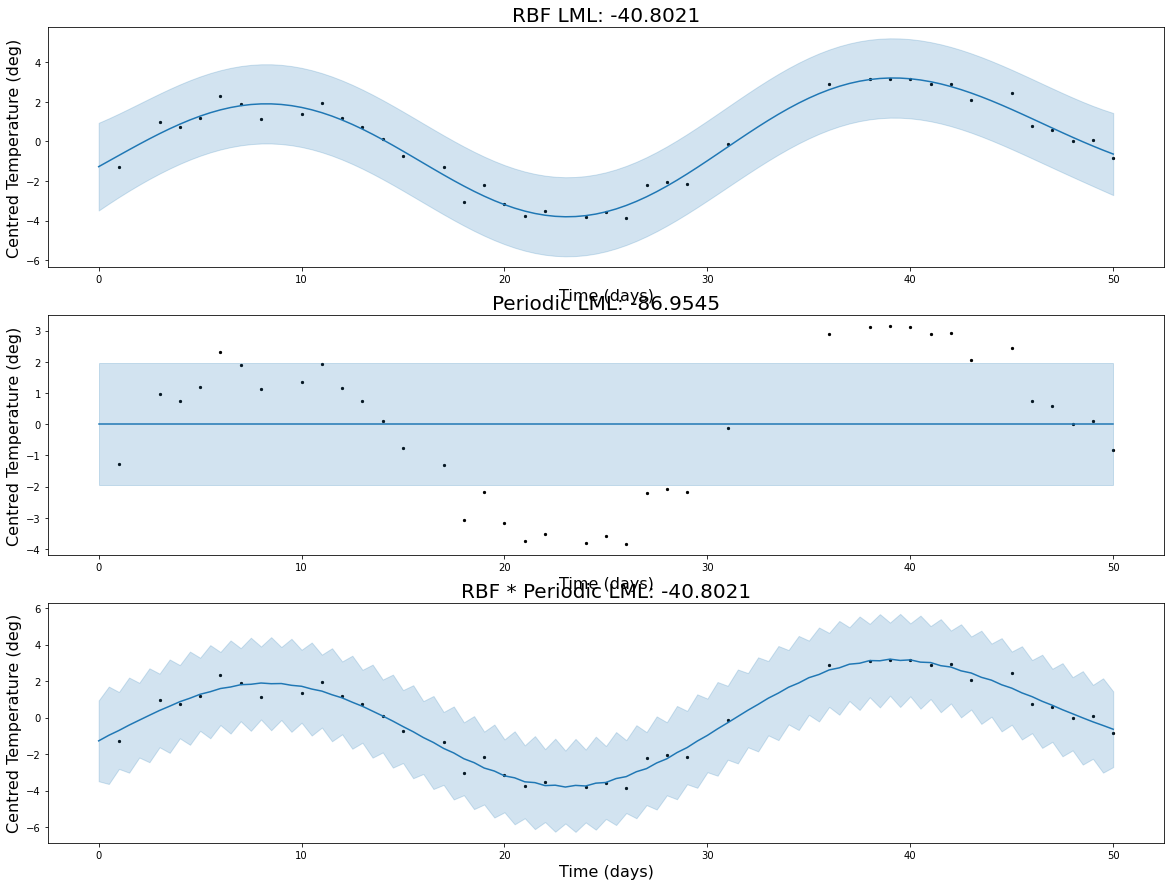

In [271]:
titles = ["RBF", "Periodic", "RBF * Periodic"]
x_plot = np.linspace(0, 50, 101)[:, None]
fig, axs = plt.subplots(3, 1, figsize=(20, 15))
for i, (f_mean, f_cov) in enumerate(gp_posteriors):
    lml = all_lmls1[i]
    f_var = np.diag(f_cov)[:, None]
    axs[i].plot(x_plot, f_mean, color="C0")
    axs[i].scatter(X, y, color="black", s=5)
    axs[i].set_xlabel("Time (days)", fontsize = 16)
    axs[i].set_ylabel("Centred Temperature (deg)", fontsize = 16)
    axs[i].set_title(titles[i] + f" LML: {round(lml, 4)}", fontsize = 20)

    # plot the 95% predictive distribution (f_var + likelihood_variance)
    axs[i].fill_between(
        x_plot[:, 0],
        (f_mean - 1.96 * np.sqrt(f_var + SIGMA_N ** 2))[:, 0],
        (f_mean + 1.96 * np.sqrt(f_var + SIGMA_N ** 2))[:, 0],
        color="C0",
        alpha=0.2,
    )
fig.savefig('gp2.pdf')

In [449]:
# periods = np.arange(0.1, 20.1, 0.1)
# all_lmlsp = []
# for per in periods:
#     kernel_functions = [
#         RBF(sigma_f=sigs[sig_idx_rbf], lengthscale=lengths[leng_idx_rbf]),
#         PeriodicKernel(sigma_f=sigs[sig_idx_rbf], lengthscale=lengths[leng_idx_rbf], period=per),
#         RBF(sigma_f=sigs[sig_idx_rbf], lengthscale=lengths[leng_idx_rbf])
#         * PeriodicKernel(sigma_f=sigs[sig_idx_rbf], lengthscale=lengths[leng_idx_rbf], period=per),
#     ]
#     all_lmlsp.append([log_marg_likelihood(X, y, k, sig_ns[sig_n_idx_rbf]) for k in kernel_functions])

# all_lmlsp = np.array(all_lmlsp)
# all_lmlsp.shape

# np.argmax(all_lmlsp)

# tuned_kernel_functions = [
#     # RBF kernel
#     RBF(sigma_f=sigs[sig_idx_rbf], lengthscale=lengths[leng_idx_rbf]),
#     # periodic kernel
#     PeriodicKernel(sigma_f=sigs[sig_idx_rbf], lengthscale=lengths[leng_idx_rbf], period=1.0),
#     # RBF x Periodic
#     RBF(sigma_f=sigs[sig_idx_rbf], lengthscale=lengths[leng_idx_rbf])
#     * PeriodicKernel(sigma_f=sigs[sig_idx_rbf], lengthscale=lengths[leng_idx_rbf], period=1.0),
# ]
# ss = [sig_ns[sig_n_idx_rbf], sig_ns[sig_n_idx_per], sig_ns[sig_n_idx_prod]]

In [103]:
Xs = np.array([[35]])

gp_posteriors_with_pred = [
    fit_gp_posterior(X, y, Xs, kernel, s) for kernel, s in zip(tuned_kernel_functions, ss)
]
gp_posteriors_with_pred # answer = mean rbf normalised

[(array([[2.18542104]]), array([[0.07586662]])),
 (array([[0.]]), array([[0.]])),
 (array([[2.20858069]]), array([[0.08716553]]))]

In [104]:
2.19233462 + mean_y

13.838338308161505

In [107]:
#y_35 = gp_posteriors_with_pred[0][0] # prediciton best model RBF using mean posterior
y_13 = 13 - mean_y

def compute_tail(mean, var):
    return 1 - norm(loc=mean, scale=np.sqrt(var)).cdf(y_13)[0][0]

tail_probs = [compute_tail(preds[0], preds[1]) for preds in gp_posteriors_with_pred]
tail_probs # likelihood of 13 deg or higher, remember temp values have been scaled by mean

[0.9987300392735223, nan, 0.9981015481260773]

In [111]:

for preds in gp_posteriors_with_pred:
    print(norm(loc=preds[0], scale=np.sqrt(preds[1])).cdf(y_13))

[[0.00126996]]
[[nan]]
[[0.00189845]]


## RBF Kernel

In [80]:
def plot_gpr_samples(gpr_model, n_samples, ax):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    x = np.linspace(0, 50, 500)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    #ax.set_ylim([-3, 3])

In [5]:
X = X.reshape(-1, 1)

y = np.squeeze(y)
y.shape

In [6]:
# use whole unscaled dataset
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

krnel = 5.0 * RBF(length_scale=2.0) # length_scale=1.0, length_scale_bounds=(1e-1, 10.0)
#krnel = sigs[sig_idx_rbf]*RBF(length_scale=lengths[leng_idx_rbf])
gpr = GaussianProcessRegressor(kernel=krnel, optimizer=None) # , random_state=0 reproducible results
n_samples = 5

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# plot prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")

# plot posterior
gpr.fit(X, y) # trained after plotting prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X[:, 0], y, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Radial Basis Function Kernel", fontsize=18)
plt.tight_layout()

In [166]:
gpr.log_marginal_likelihood_value_

-3908.844048807486

In [167]:
krnel = 1.0 * RBF() # length_scale=1.0, length_scale_bounds=(1e-1, 10.0)
gpr_opt = GaussianProcessRegressor(kernel=krnel)
gpr_opt.fit(X, y)
gpr_opt.log_marginal_likelihood_value_

-64.94225637471999

In [168]:
gpr_opt.kernel

1**2 * RBF(length_scale=1)

## Mattern Kernel

In [7]:
from sklearn.gaussian_process.kernels import Matern

krnel = 1.0 * Matern() # length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5
gpr = GaussianProcessRegressor(kernel=krnel, optimizer = None)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# plot prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")

# plot posterior
gpr.fit(X, y)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X[:, 0], y, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Mattern kernel", fontsize=18)
plt.tight_layout()


In [170]:
gpr.log_marginal_likelihood_value_

-86.03804495065864

In [171]:
krnel = 1.0 * Matern() # length_scale=1.0, length_scale_bounds=(1e-1, 10.0)
gpr_opt = GaussianProcessRegressor(kernel=krnel)
gpr_opt.fit(X, y)
gpr_opt.log_marginal_likelihood_value_

-54.64811968880322

In [172]:
gpr_opt.kernel

1**2 * Matern(length_scale=1, nu=1.5)

## Periodic (ExpSineSquared) Kernel

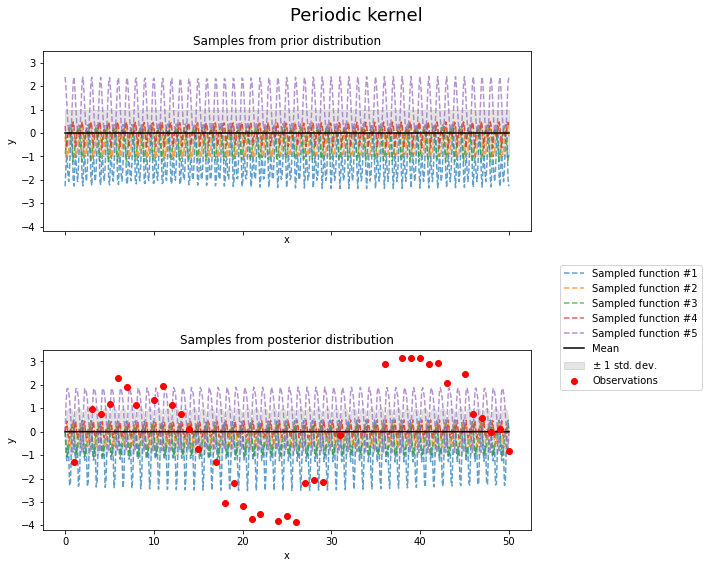

In [33]:
from sklearn.gaussian_process.kernels import ExpSineSquared

krnel = 1.0 * ExpSineSquared()
#     length_scale=1.0,
#     periodicity=3.0,
#     length_scale_bounds=(0.1, 10.0),
#     periodicity_bounds=(1.0, 10.0),
# )
gpr = GaussianProcessRegressor(kernel=krnel, optimizer=None)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# plot prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")

# plot posterior
gpr.fit(X, y)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X[:, 0], y, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Periodic kernel", fontsize=18)
plt.tight_layout()

In [295]:
gpr.log_marginal_likelihood_value_

-985718899194.535

In [34]:
krnel = 1.0 * ExpSineSquared() # length_scale=1.0, length_scale_bounds=(1e-1, 10.0)
gpr_opt = GaussianProcessRegressor(kernel=krnel)
gpr_opt.fit(X, y)
gpr_opt.log_marginal_likelihood_value_

-86.93585185064394

In [35]:
gpr_opt.kernel

1**2 * ExpSineSquared(length_scale=1, periodicity=1)

Could auto run through multple kernels

In [44]:
# mean_prediction, std_prediction = gpr_opt.predict(X, return_std=True)

# plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
# plt.scatter(X, y, label="Observations")
# plt.plot(X, mean_prediction, label="Mean prediction")
# plt.fill_between(
#     X.ravel(),
#     mean_prediction - 1.96 * std_prediction,
#     mean_prediction + 1.96 * std_prediction,
#     alpha=0.5,
#     label=r"95% confidence interval",
# )
# plt.legend()
# plt.xlabel("$x$")
# plt.ylabel("$f(x)$")
# _ = plt.title("Gaussian process regression on noise-free dataset")

In [42]:
gpr_opt.predict(np.array(35).reshape(1, -1)) # normalised value

array([1.68067329])

In [50]:
y_13 = 13 - mean_y

def compute_tail(mean, var):
    return 1 - norm(loc=mean, scale=np.sqrt(var)).cdf(y_13)[0][0]

In [52]:
mean_pred, std_pred = gpr_opt.predict(np.array(35).reshape(1, -1), return_std=True)

In [51]:
tail_probs = [compute_tail(mean_pred, std_pred**2)]
tail_probs # likelihood of 13 deg or higher, remember temp values have been scaled by mean

IndexError: invalid index to scalar variable.

In [59]:
norm(loc=mean_pred, scale=std_pred).cdf(y_13)

array([0.40195125])

## 2.


In [236]:
y = df["temp"].values[:, None]
X = df[['d', 't']].values
mean_y = np.mean(y)
y -= mean_y
#plt.plot(X, y)

In [237]:
X.shape

(400, 2)

Text(0.5, 1.0, 'Water Water Temperature vs Distance from Coast')

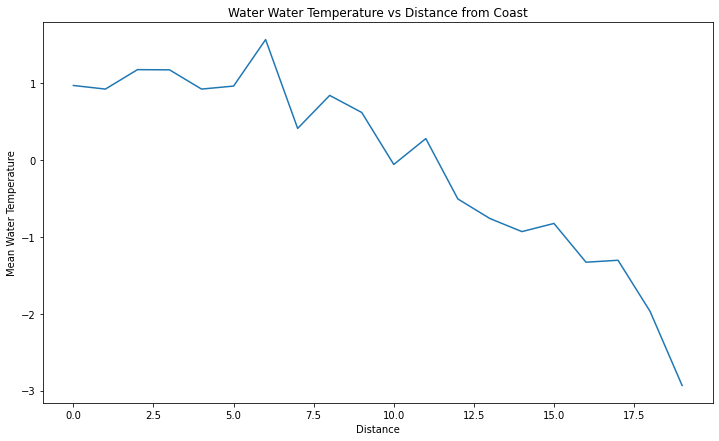

In [238]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(df.groupby('d').mean()[['temp']])
ax.set_xlabel('Distance')
ax.set_ylabel('Mean Water Temperature')
ax.set_title('Water Water Temperature vs Distance from Coast')

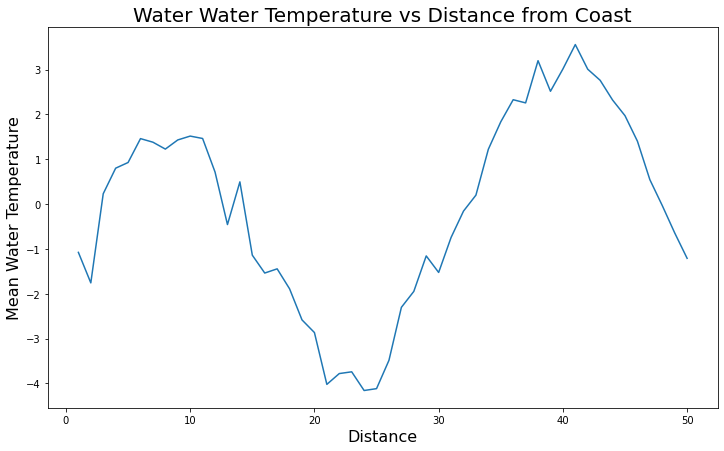

In [239]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(df.groupby('t').mean()[['temp']])
ax.set_xlabel('Distance', fontsize = 16)
ax.set_ylabel('Mean Water Temperature', fontsize = 16)
ax.set_title('Water Water Temperature vs Distance from Coast', fontsize = 20)
plt.savefig('q22.pdf')

In [478]:
rng = np.random.RandomState(4)
X_train = rng.uniform(0, 5, 10).reshape(-1, 1)
y_train = np.sin((X_train[:, 0] - 2.5) ** 2)
y_train.shape

(10,)

In [240]:
X = X.reshape(-1, 2)
y = np.squeeze(y)
y.shape

(400,)

In [250]:
X.shape

(400, 2)

In [241]:
from sklearn.gaussian_process.kernels import ConstantKernel, DotProduct, WhiteKernel, RationalQuadratic, RBF

#krnel = RationalQuadratic() + RBF()
krnel =  RBF() + DotProduct()# * ConstantKernel(0.1, (0.01, 10.0))

gpr = GaussianProcessRegressor(kernel=krnel, optimizer = None)

# fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# # plot prior
# plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
# axs[0].set_title("Samples from prior distribution")

# # plot posterior
gpr.fit(X, y)
# plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
# axs[1].scatter(X[:, 0], y, color="red", zorder=10, label="Observations")
# axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
# axs[1].set_title("Samples from posterior distribution")

# fig.suptitle("Mattern kernel", fontsize=18)
# plt.tight_layout()

GaussianProcessRegressor(kernel=RBF(length_scale=1) + DotProduct(sigma_0=1),
                         optimizer=None)

In [242]:
gpr.log_marginal_likelihood_value_

-747.9831506967812

In [243]:
gpr_opt = GaussianProcessRegressor(kernel=krnel)
gpr_opt.fit(X, y)
gpr_opt.log_marginal_likelihood_value_

-740.6146484740566

In [249]:
len(gpr_opt.predict(X, return_std=True)[1])

400

In [258]:
x_plot = np.linspace(0, 400, 400)
x_plot.shape

(400,)

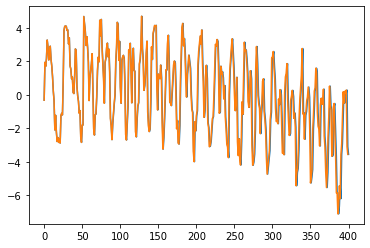

In [259]:
plt.plot(x_plot, gpr_opt.predict(X, return_std=True)[0])
plt.plot(y)

In [ ]:
titles = ["RBF * Linear"]
x_plot = np.linspace(0, 50, 101)[:, None]
fig, axs = plt.subplots(figsize=(12, 7))
for i, (f_mean, f_cov) in enumerate(gp_posteriors):
    lml = all_lmls1[i]
    f_var = np.diag(f_cov)[:, None]
    axs[i].plot(x_plot, f_mean, color="C0")
    axs[i].scatter(X, y, color="black", s=5)
    axs[i].set_xlabel("Time (days)", fontsize = 16)
    axs[i].set_ylabel("Centred Temperature (deg)", fontsize = 16)
    axs[i].set_title(titles[i] + f" LML: {round(lml, 4)}", fontsize = 20)

    # plot the 95% predictive distribution (f_var + likelihood_variance)
    axs[i].fill_between(
        x_plot[:, 0],
        (f_mean - 1.96 * np.sqrt(f_var + SIGMA_N ** 2))[:, 0],
        (f_mean + 1.96 * np.sqrt(f_var + SIGMA_N ** 2))[:, 0],
        color="C0",
        alpha=0.2,
    )
fig.savefig('gp2.pdf')

3D plot

TypeError: plot() missing 1 required positional argument: 'ys'

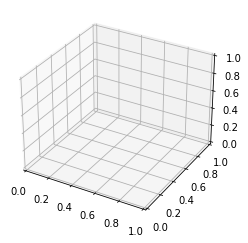

In [41]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
# zline = np.linspace(0, 50, 100)
# xline = np.sin(zline)
# yline = np.cos(zline)
ax.plot3D(gpr_opt.predict(X, return_std=True))

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
#ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');
ax.scatter3D(df['d'], df['t'], df['temp'])

In [29]:
df_new = pd.DataFrame()
df_new['d_pred'] = np.arange(1, 20)
df_new['t_pred'] = 55
df_new

,d_pred,t_pred
0,1,55
1,2,55
2,3,55
3,4,55
4,5,55
5,6,55
6,7,55
7,8,55
8,9,55
9,10,55


In [30]:
#y_pred = df_new["temp"].values[:, None]
X_pred = df_new[['d_pred', 't_pred']].values

In [38]:
X_pred[1:10,1]

array([55, 55, 55, 55, 55, 55, 55, 55, 55], dtype=int64)

In [40]:
gpr_opt.predict(X_pred)

array([ 2.24664015,  2.06591993,  1.8851926 ,  1.70447225,  1.52374898,
        1.34301463,  1.16227725,  0.98154093,  0.80079631,  0.62005112,
        0.43931595,  0.25856467,  0.0778196 , -0.10288251, -0.28359413,
       -0.46433416, -0.64508687, -0.82583881, -1.00656879])

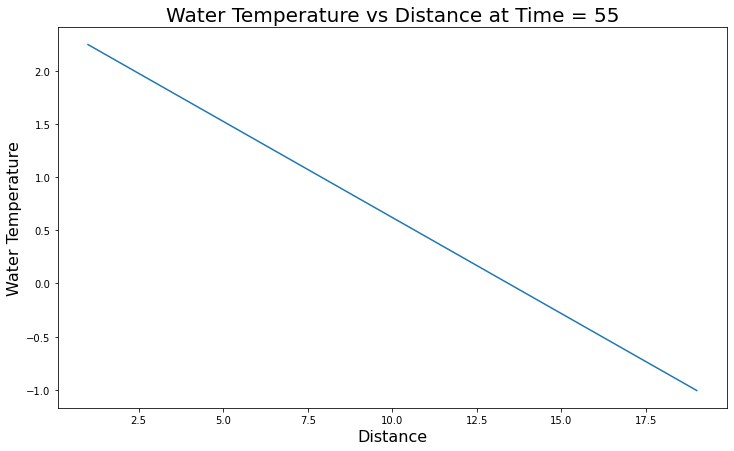

In [24]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(df_new['d_pred'], gpr_opt.predict(X_pred))
ax.set_xlabel('Distance', fontsize = 16)
ax.set_ylabel('Water Temperature', fontsize = 16)
ax.set_title('Water Temperature vs Distance at Time = 55', fontsize = 20)
plt.savefig('q222.pdf')